In [1]:
import numpy as np
import matplotlib.pyplot as plt

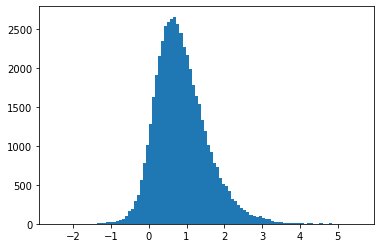

In [3]:

dist = np.load(f"combinedWorkDistributionArray.npy")

plt.hist(dist, bins = 100)

plt.show()

In [8]:
def MFT_check(dist, target_work, upper_limit = 12, lower_limit = -12, number_of_bins = 50):
    # 1. define the positive and negative distribution
    positive_dist = dist[dist >= 0]
    negative_dist = dist[dist < 0]
    
    # 2. define the bins for positive and negative dist
    t_range = np.linspace(lower_limit, upper_limit, 200)
    p_range = np.linspace(0, upper_limit, number_of_bins)
    n_range = np.linspace(lower_limit, 0, number_of_bins)
    
    # 3. find the bins and counts for the +ve and -ve dist
    positive_counts, positive_bins = np.histogram(positive_dist, bins = p_range)
    negative_counts, negative_bins = np.histogram(negative_dist, bins = n_range)
    
    # 4. find the counts for the target work you want to compare
    p_target_bin_index = np.where(p_range >= target_work)[0][0]
    n_target_bin_index = np.where(n_range <= -target_work)[0][-1]
    p_target_bin_value = positive_bins[p_target_bin_index]
    n_target_bin_value = negative_bins[n_target_bin_index]
    p_target_count = positive_counts[p_target_bin_index]
    n_target_count = negative_counts[n_target_bin_index]
    
    print(f"the number of count in the bin value {p_target_bin_value}: {p_target_count}")
    print(f"the number of count in the bin value {n_target_bin_value}: {n_target_count}")

    # 5. find the probability of p(+W) and p(-W) * exp(W)
    
    total_number = len(dist)
    prob_p_W = p_target_count / total_number
    prob_n_W = n_target_count / total_number
    LHS = prob_p_W
    RHS = prob_n_W * np.exp(target_work)
    print(f"work = {target_work}")
    print(f"LHS [p(+W)] = {LHS}")
    print(f"RHS [p(-W) * exp(W)] = {RHS}")
    print("-" * 20)
    return (LHS, RHS)

In [9]:
for x in np.random.uniform(0, 12, 10):
    MFT_check(dist, x, number_of_bins = 50)

the number of count in the bin value 4.408163265306122: 9
the number of count in the bin value -4.408163265306123: 0
work = 4.247826288329458
LHS [p(+W)] = 0.00018
RHS [p(-W) * exp(W)] = 0.0
--------------------
the number of count in the bin value 4.653061224489796: 6
the number of count in the bin value -4.653061224489796: 0
work = 4.4470694732424345
LHS [p(+W)] = 0.00012
RHS [p(-W) * exp(W)] = 0.0
--------------------
the number of count in the bin value 2.9387755102040813: 207
the number of count in the bin value -2.9387755102040813: 0
work = 2.797431439611675
LHS [p(+W)] = 0.00414
RHS [p(-W) * exp(W)] = 0.0
--------------------
the number of count in the bin value 7.1020408163265305: 0
the number of count in the bin value -7.1020408163265305: 0
work = 6.9730992159464975
LHS [p(+W)] = 0.0
RHS [p(-W) * exp(W)] = 0.0
--------------------
the number of count in the bin value 3.183673469387755: 111
the number of count in the bin value -3.183673469387756: 0
work = 3.0887501352171554
LHS